In [1]:
import pennylane as qml
import numpy as np


In [2]:
## code for VGQEC 3 encoding
def VGQEC_3_encoding(wires):
    # A = (1.0 + np.exp(1j * alpha)) / 2.0
    # B = (1.0 - np.exp(1j * alpha)) / 2.0
    # ancillas = np.array([A, 0, 0, B], dtype=complex)
    # qml.MottonenStatePreparation(ancillas, wires=[1, 2])

    # qml.CNOT(wires=[0, 1])
    # qml.CNOT(wires=[0, 2])
    for wire in wires[1:]:
        qml.CNOT(wires=[0, wire])
    # for wire in wires:
    #     qml.Hadamard(wires=wire)





(<Figure size 500x400 with 1 Axes>, <Axes: >)


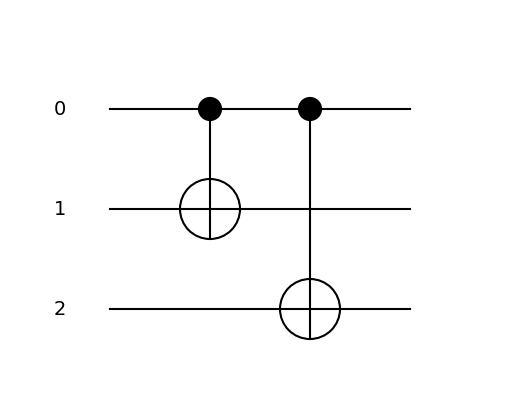

In [256]:
print(qml.draw_mpl(VGQEC_3_encoding)(wires=[0, 1, 2]))

In [ ]:
# #testing the encoding circuit
# dev = qml.device("default.qubit", wires=3)
# @qml.qnode(dev)
# def VGQEC_3(alpha, wires):
#     # qml.PauliX(wires=0) # Initial state 
#     VGQEC_3_encoding(alpha, wires)

#     # return qml.state()

# # print(VGQEC_3(np.pi, dev.wires))

[-1.34442674e-33+6.12323400e-17j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  1.00000000e+00+2.58605321e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]


In [4]:

#variational recovery circuit for 3 qubits
# def encoding_variational_3(alpha, L , wires):
#     for i in range(L):
#         qml.RX(alpha[0], wires=wires[0])     
#         qml.RX(alpha[1], wires=wires[1])
#         qml.RX(alpha[2], wires=wires[2])

#         qml.RY(alpha[3], wires=wires[0])
#         qml.RY(alpha[4], wires=wires[1])
#         qml.RY(alpha[5], wires=wires[2]) 
    
#         qml.CZ(wires=[0, 1])
#         qml.CZ(wires=[1, 2])
#         qml.CZ(wires=[0, 2])

#variational recovery circuit for 3 qubits
def encoding_variational_3(alpha, L, wires):
    for layer in range(L):
        base = layer * 6  # each layer uses 6 parameters

        # RX gates
        for i in range(3):
            qml.RX(alpha[base + i], wires=wires[i])

        # RY gates
        for i in range(3):
            qml.RY(alpha[base + 3 + i], wires=wires[i])

        # CZ entangling pattern (fixed)
        qml.CZ(wires=[0, 1])
        qml.CZ(wires=[1, 2])
        qml.CZ(wires=[0, 2])






(<Figure size 800x400 with 1 Axes>, <Axes: >)


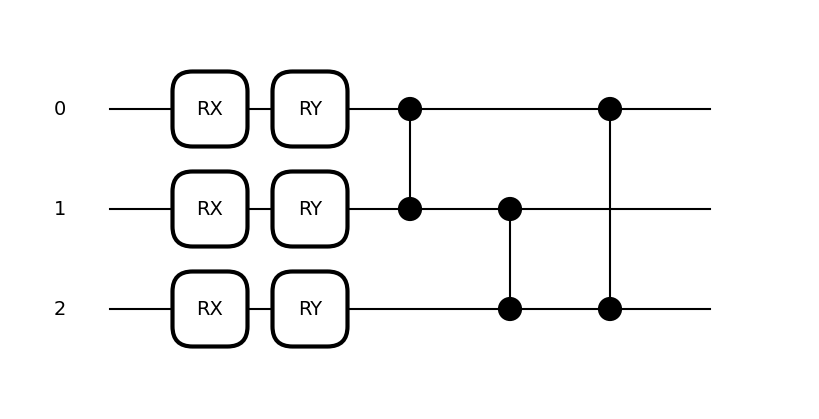

In [5]:
print(qml.draw_mpl(encoding_variational_3)([np.pi, np.pi, np.pi, np.pi, np.pi, np.pi,np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], 1, wires=[0, 1, 2]))
# print(qml.draw_mpl(encoding_variational_3)([np.pi, np.pi], 1, wires=[0, 1, 2]))


In [6]:
 # qml.RZ(beta[0], wires=wires[0])
    # qml.RZ(beta[1], wires=wires[1])
    # qml.RZ(beta[2], wires=wires[2])
    # qml.RZ(beta[3], wires=wires[3])
    # qml.RZ(beta[4], wires=wires[4])

    # for i in range(L):

    #     qml.RX(beta[5], wires=wires[0])
    #     qml.RX(beta[6], wires=wires[1])
    #     qml.RX(beta[7], wires=wires[2])
    #     qml.RX(beta[8], wires=wires[3])
    #     qml.RX(beta[9], wires=wires[4])

    #     qml.RZ(beta[10], wires=wires[0])
    #     qml.RZ(beta[11], wires=wires[1])
    #     qml.RZ(beta[12], wires=wires[2])
    #     qml.RZ(beta[13], wires=wires[3])
    #     qml.RZ(beta[14], wires=wires[4])

    #     qml.IsingZZ(beta[15], wires=[0, 1])
    #     qml.IsingZZ(beta[16], wires=[1, 2])
    #     qml.IsingZZ(beta[17], wires=[2, 3])
    #     qml.IsingZZ(beta[18], wires=[3, 4])
    #     qml.IsingZZ(beta[19], wires=[0, 2])
    #     qml.IsingZZ(beta[20], wires=[2, 4])
    #     qml.IsingZZ(beta[21], wires=[1, 3])
    #     qml.IsingZZ(beta[22], wires=[0, 3])
    #     qml.IsingZZ(beta[23], wires=[1, 4])
    #     qml.IsingZZ(beta[24], wires=[0, 4])

    # qml.RX(beta[25], wires=wires[0])
    # qml.RX(beta[26], wires=wires[1])
    # qml.RX(beta[27], wires=wires[2])
    # qml.RX(beta[28], wires=wires[3])
    # qml.RX(beta[29], wires=wires[4])

    # qml.RZ(beta[30], wires=wires[0])
    # qml.RZ(beta[31], wires=wires[1])
    # qml.RZ(beta[32], wires=wires[2])
    # qml.RZ(beta[33], wires=wires[3])
    # qml.RZ(beta[34], wires=wires[4])




    # for wire in wires:
    #     qml.RZ(beta[0], wires=wire)


    # for wire in wires:
    #     qml.RX(beta[1], wires=wire)
    #     qml.RZ(beta[2], wires=wire)        

    # qml.IsingZZ(beta[3], wires=[0, 1])
    # qml.IsingZZ(beta[4], wires=[1, 2])
    # qml.IsingZZ(beta[5], wires=[2, 3])
    # qml.IsingZZ(beta[6], wires=[3, 4])
    # qml.IsingZZ(beta[7], wires=[0, 2])
    # qml.IsingZZ(beta[8], wires=[2, 4])
    # qml.IsingZZ(beta[9], wires=[1, 3])
    # qml.IsingZZ(beta[10], wires=[0, 3])
    # qml.IsingZZ(beta[11], wires=[1, 4])
    # qml.IsingZZ(beta[12], wires=[0, 4])

    # for wire in wires:
    #     qml.RX(beta[13], wires=wire)
    #     qml.RZ(beta[14], wires=wire)        

    # qml.IsingZZ(beta[15], wires=[0, 1])
    # qml.IsingZZ(beta[16], wires=[1, 2])
    # qml.IsingZZ(beta[17], wires=[2, 3])
    # qml.IsingZZ(beta[18], wires=[3, 4])
    # qml.IsingZZ(beta[19], wires=[0, 2])
    # qml.IsingZZ(beta[20], wires=[2, 4])
    # qml.IsingZZ(beta[21], wires=[1, 3])
    # qml.IsingZZ(beta[22], wires=[0, 3])
    # qml.IsingZZ(beta[23], wires=[1, 4])
    # qml.IsingZZ(beta[24], wires=[0, 4])

    # for wire in wires:
    #     qml.RX(beta[25], wires=wire)
    #     qml.RZ(beta[26], wires=wire) 

def recovery_variational_3(beta, L, wires):   
    # qml.RZ(beta[0], wires=wires[0])
    # qml.RZ(beta[1], wires=wires[1])
    # qml.RZ(beta[2], wires=wires[2])
    # qml.RZ(beta[3], wires=wires[3])
    # qml.RZ(beta[4], wires=wires[4])

    # for i in range(L):

    #     qml.RX(beta[5], wires=wires[0])
    #     qml.RX(beta[6], wires=wires[1])
    #     qml.RX(beta[7], wires=wires[2])
    #     qml.RX(beta[8], wires=wires[3])
    #     qml.RX(beta[9], wires=wires[4])

    #     qml.RZ(beta[10], wires=wires[0])
    #     qml.RZ(beta[11], wires=wires[1])
    #     qml.RZ(beta[12], wires=wires[2])
    #     qml.RZ(beta[13], wires=wires[3])
    #     qml.RZ(beta[14], wires=wires[4])

    #     qml.IsingZZ(beta[15], wires=[0, 1])
    #     qml.IsingZZ(beta[16], wires=[1, 2])
    #     qml.IsingZZ(beta[17], wires=[2, 3])
    #     qml.IsingZZ(beta[18], wires=[3, 4])
    #     qml.IsingZZ(beta[19], wires=[0, 2])
    #     qml.IsingZZ(beta[20], wires=[2, 4])
    #     qml.IsingZZ(beta[21], wires=[1, 3])
    #     qml.IsingZZ(beta[22], wires=[0, 3])
    #     qml.IsingZZ(beta[23], wires=[1, 4])
    #     qml.IsingZZ(beta[24], wires=[0, 4])

    # qml.RX(beta[25], wires=wires[0])
    # qml.RX(beta[26], wires=wires[1])
    # qml.RX(beta[27], wires=wires[2])
    # qml.RX(beta[28], wires=wires[3])
    # qml.RX(beta[29], wires=wires[4])

    # qml.RZ(beta[30], wires=wires[0])
    # qml.RZ(beta[31], wires=wires[1])
    # qml.RZ(beta[32], wires=wires[2])
    # qml.RZ(beta[33], wires=wires[3])
    # qml.RZ(beta[34], wires=wires[4])

    # Initial RZ on all qubits
    for i in range(5):
        qml.RZ(beta[i], wires=wires[i])
    
    param_offset = 5  # initial offset

    for layer in range(L):
        layer_base = param_offset + layer * 20

        # RX layer
        for i in range(5):
            qml.RX(beta[layer_base + i], wires=wires[i])

        # RZ layer
        for i in range(5):
            qml.RZ(beta[layer_base + 5 + i], wires=wires[i])

        # IsingZZ entangling gates (10 total)
        zz_pairs = [
            (0, 1), (1, 2), (2, 3), (3, 4),
            (0, 2), (2, 4), (1, 3), (0, 3), (1, 4), (0, 4)
        ]
        for j, (a, b) in enumerate(zz_pairs):
            qml.IsingZZ(beta[layer_base + 10 + j], wires=[wires[a], wires[b]])

    # Final RX layer
    final_rx_offset = param_offset + L * 20
    for i in range(5):
        qml.RX(beta[final_rx_offset + i], wires=wires[i])

    # Final RZ layer
    for i in range(5):
        qml.RZ(beta[final_rx_offset + 5 + i], wires=wires[i])


(<Figure size 1700x600 with 1 Axes>, <Axes: >)


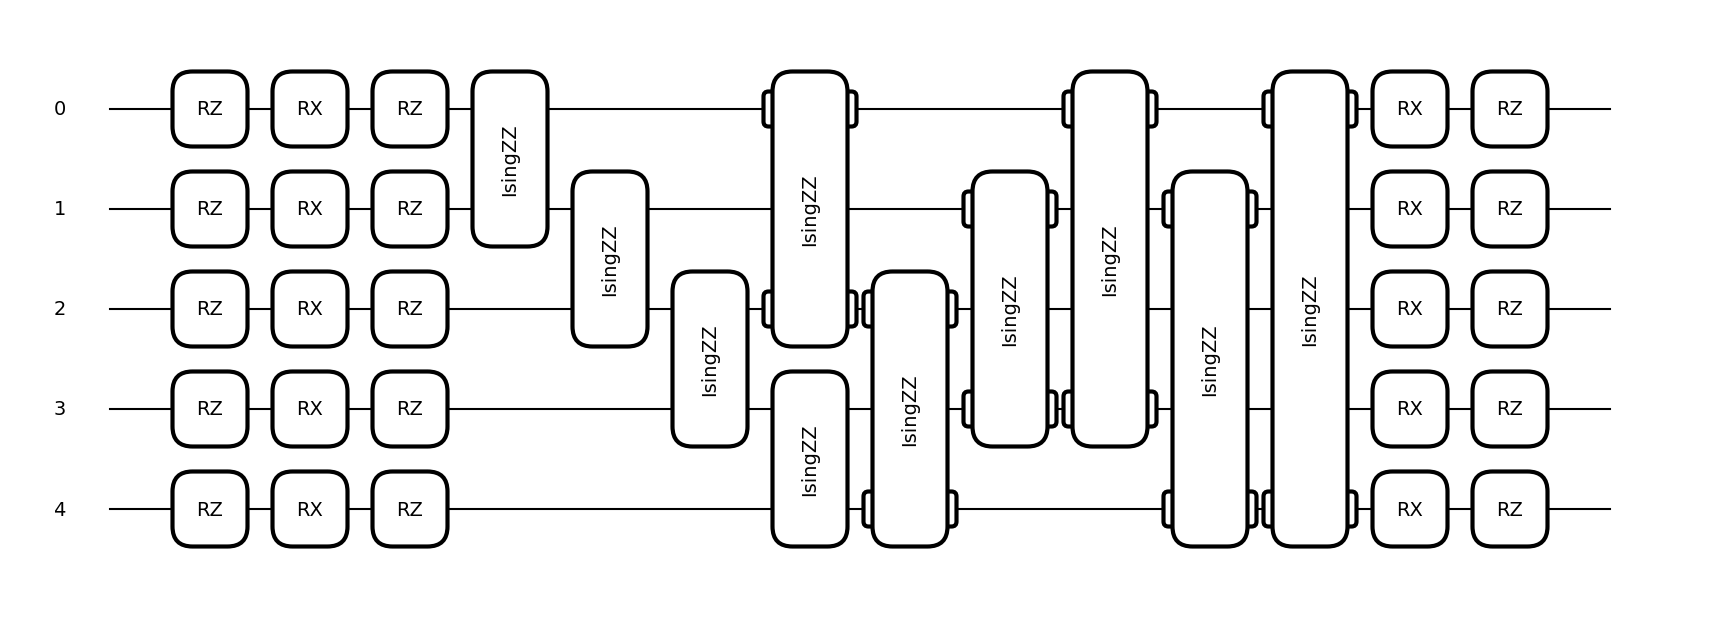

In [7]:
print(qml.draw_mpl(recovery_variational_3)([np.pi, np.pi, np.pi,np.pi, np.pi, np.pi,np.pi,np.pi, np.pi, np.pi,np.pi, np.pi, np.pi,np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], 1, wires=[0, 1, 2, 3, 4]))
# print(qml.draw_mpl(recovery_variational_3)([np.pi, np.pi, np.pi], 2, wires=[0, 1, 2, 3, 4]))

(<Figure size 2800x600 with 1 Axes>, <Axes: >)


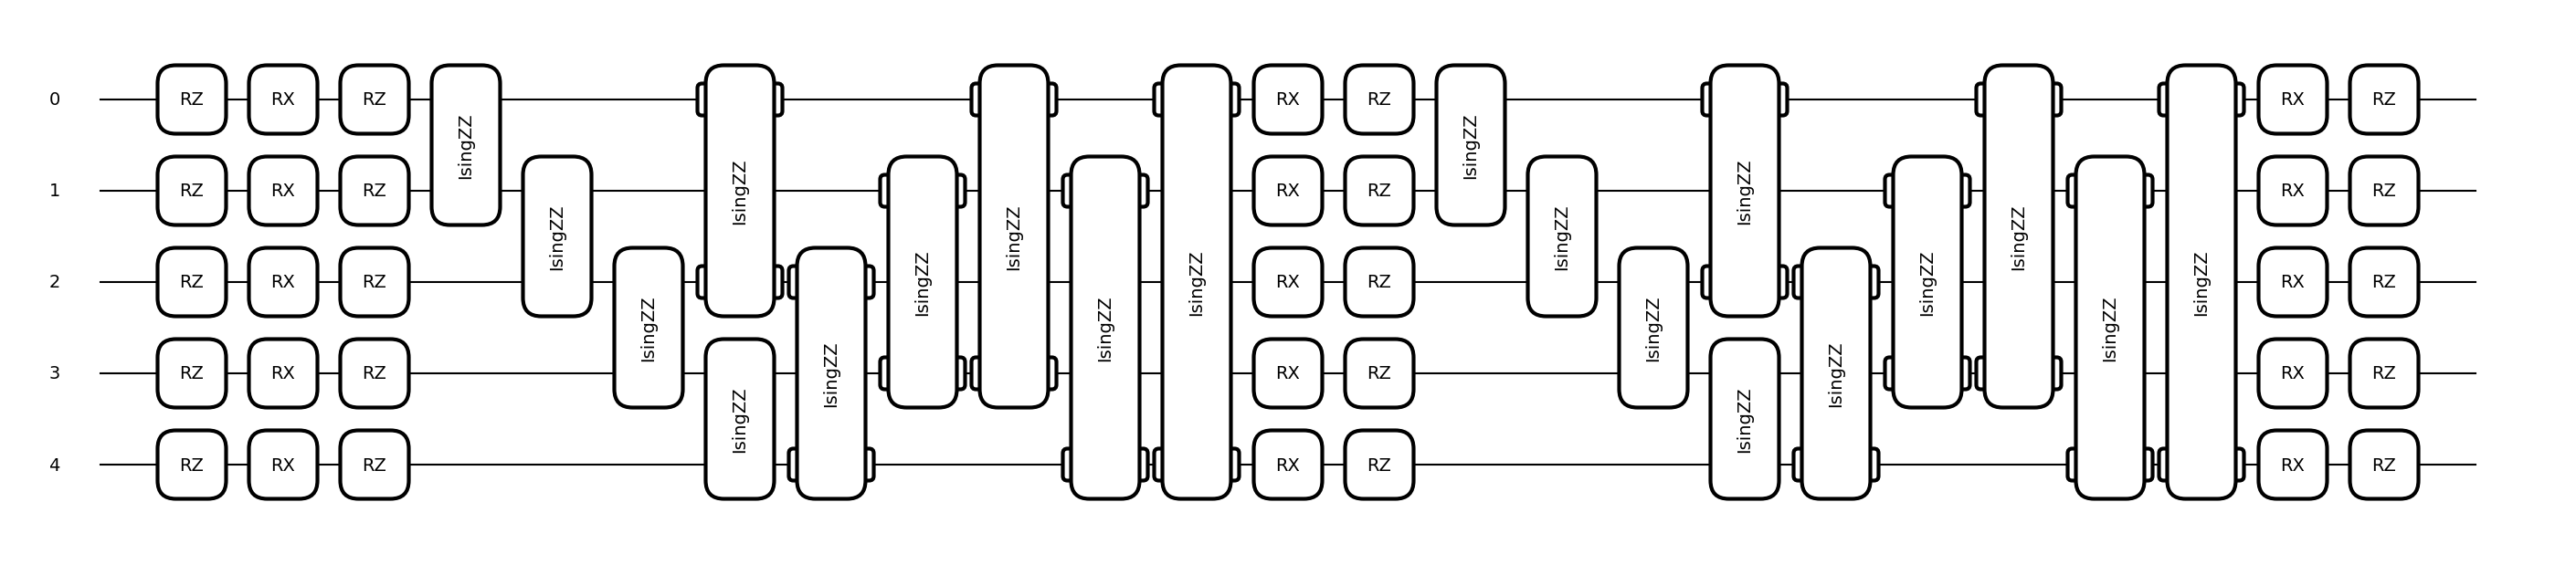

In [29]:
print(qml.draw_mpl(recovery_variational_3)([np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi,np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], 1, wires=[0, 1, 2, 3, 4]))

In [ ]:

#reovery map circuit for 3 qubits (from the repetition code)
def repetition_code_recovery_3(wires):
    # for wire in wires:
    #     qml.Hadamard(wires=wire)
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])
    qml.Toffoli(wires=[2, 1, 0])




(<Figure size 600x400 with 1 Axes>, <Axes: >)


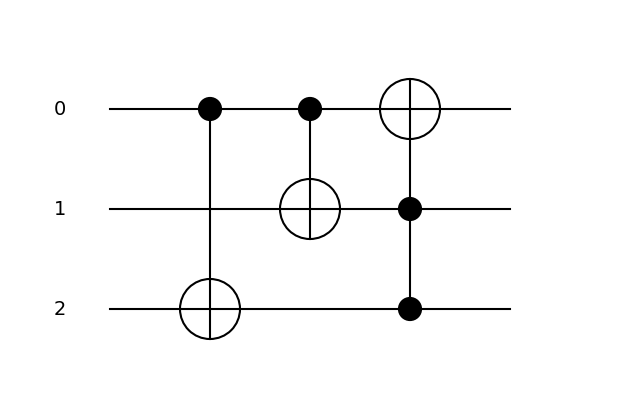

In [265]:
print(qml.draw_mpl(repetition_code_recovery_3)(wires=[0, 1, 2]))

In [13]:
# ## code for VGQEC 3 encoding
# def VGQEC_3_encoding(alpha, wires):
#     # A = (1.0 + np.exp(1j * alpha)) / 2.0
#     # B = (1.0 - np.exp(1j * alpha)) / 2.0
#     # ancillas = np.array([A, 0, 0, B], dtype=complex)
#     # qml.MottonenStatePreparation(ancillas, wires=[1, 2])

#     # qml.CNOT(wires=[0, 1])
#     # qml.CNOT(wires=[0, 2])
#     for wire in wires:
#         qml.Hadamard(wires=wire)
#     qml.CNOT(wires=[0, 2])
#     qml.CNOT(wires=[0, 1])
#     qml.Toffoli(wires=[2, 1, 0])


# #variational recovery circuit for 3 qubits
# def recovery_variational_3(beta, L , wires):
#     for i in range(2):
#         qml.RZ(beta[1], wires=i)

#     for l in range(L):
#         for i in range(2):
#             qml.RX(beta[0], wires=i)
#             qml.RZ(beta[1], wires=i)

#         qml.CZ(wires=[0, 1])
#         qml.CZ(wires=[1, 2])
#         qml.CZ(wires=[0, 2])


#     for i in range(2):
#         qml.RX(beta[0], wires=i)
#         qml.RZ(beta[1], wires=i)

# #reovery map circuit for 3 qubits (from the repetition code)
# def repetition_code_recovery_3(alpha, wires):
# # 1. Undo the two CNOTs
#     qml.CNOT(wires=[0, 2])
#     qml.CNOT(wires=[0, 1])
    
#     # 2. Undo ancilla preparation
#     #    We apply the inverse of the state prep:
#     A = (1.0 + np.exp(1j * alpha)) / 2.0
#     B = (1.0 - np.exp(1j * alpha)) / 2.0
#     ancillas_dagger = np.array([np.conj(A), 0, 0, np.conj(B)], dtype=complex)
#     qml.MottonenStatePreparation(ancillas_dagger, wires=[1, 2])


#test for VGQEC code with 3 qubits
dev3_VGQEC_circuit = qml.device("default.mixed", wires=5)
@qml.qnode(dev3_VGQEC_circuit)
def circuit_3(wires, alpha, beta, gamma):
    # qml.Hadamard(wires=0)
    #encoding
    VGQEC_3_encoding(wires=[0, 1, 2])
    encoding_variational_3(alpha, 2, wires)
    # #noise
    qml.AmplitudeDamping(gamma, wires=[0])
    qml.AmplitudeDamping(gamma, wires=[1])
    qml.AmplitudeDamping(gamma, wires=[2])

    # # qml.PauliZ(wires=0)
    # #recovery
    recovery_variational_3(beta, 2, wires)
    # repetition_code_recovery_3(wires)

    return qml.density_matrix(wires=0)

print(circuit_3(dev3_VGQEC_circuit.wires, [np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], [np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], 0.2))

[[ 3.74939946e-33-8.27629854e-81j -1.49975978e-32-6.12323400e-17j]
 [-1.49975978e-32+6.12323400e-17j  1.00000000e+00-4.13814927e-81j]]


(<Figure size 4000x600 with 1 Axes>, <Axes: >)


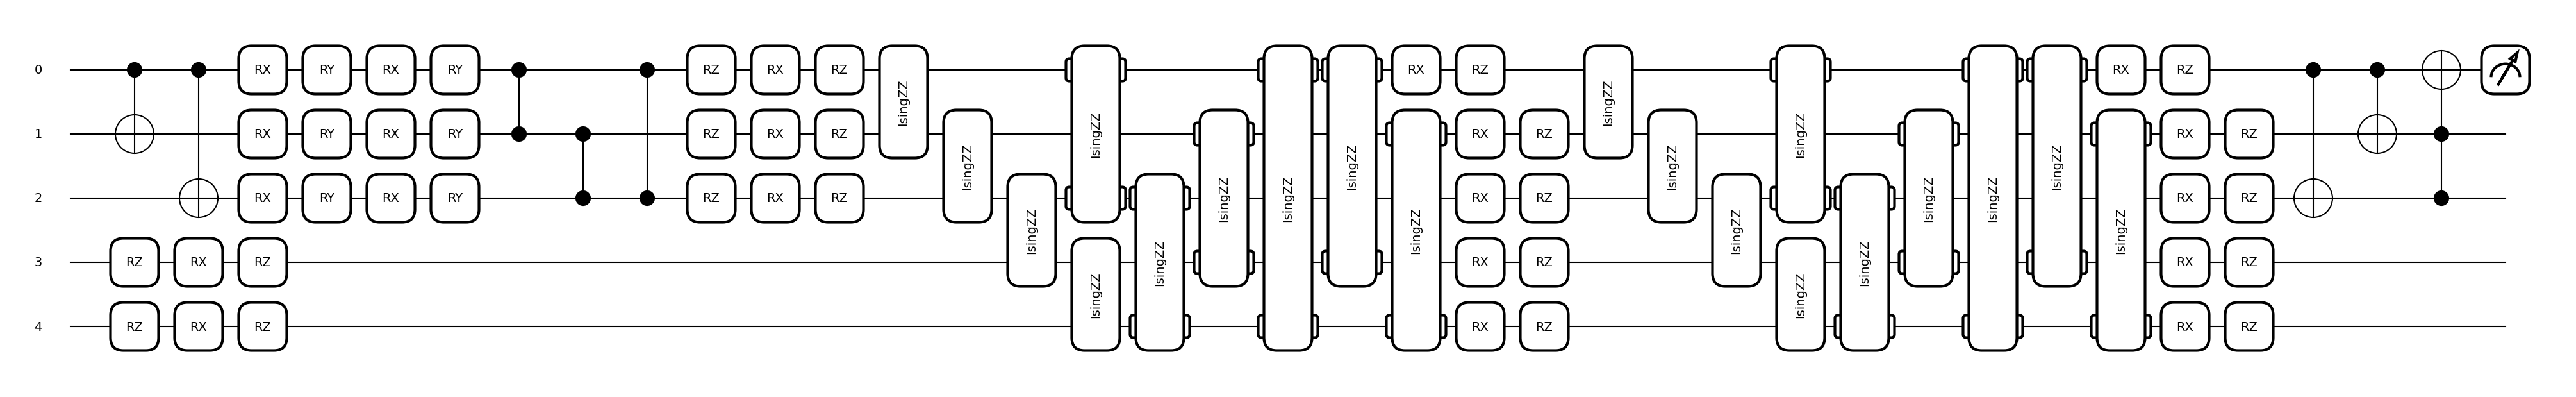

In [255]:
print(qml.draw_mpl(circuit_3)(dev3_VGQEC_circuit.wires, [np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], [np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi, np.pi], 0.2))

(<Figure size 4100x600 with 1 Axes>, <Axes: >)


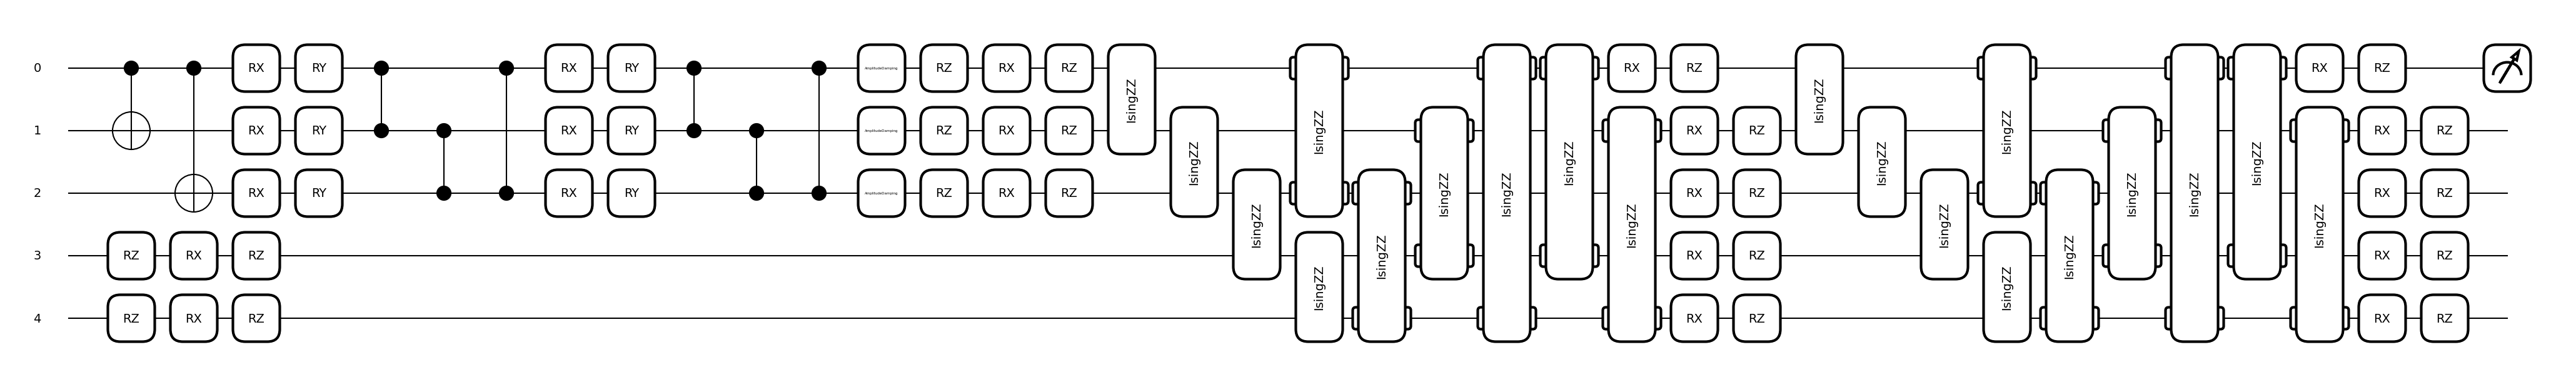

In [14]:
print(qml.draw_mpl(circuit_3)(dev3_VGQEC_circuit.wires, [np.pi, np.pi], [np.pi, np.pi, np.pi], 0.2))